In [363]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from sympy import plot_implicit, symbols, Eq
import pandas as pd
import seaborn as sns 

%run functions.ipynb

**Perceptron w/ offset:**

e.g.1

In [163]:
X = np.array([[1,3],[2.5, 1.5], [-1.5, 1.5]])
y = [1, 1, - 1]

df = pd.DataFrame(X, columns=['x1', 'x2'])
df = df.assign(y = y)

theta, theta_0 = perceptron_with_offset(X, y, 100)

The data set has 2 features, 3 data points.

After 2 mistake(s), the Perceptron Algorithm (w/ offset) yields theta = [[2.5]
 [1.5]], theta_0 = [0.] on the 2th instance



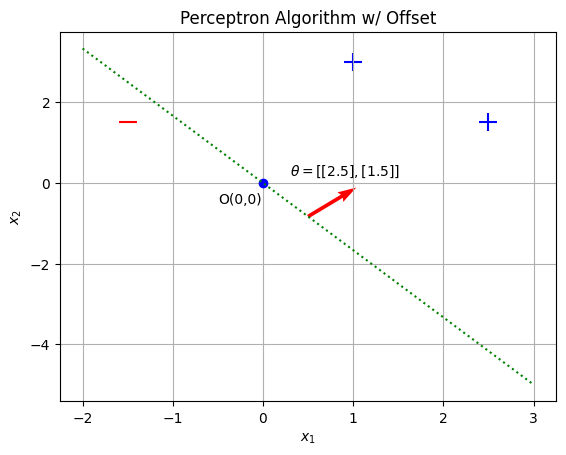

In [164]:
plt.scatter(df[df['y']==1]['x1'], df[df['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y']==-1]['x1'], df[df['y']==-1]['x2'], marker='_', s=150, c='r')
plt.title('Perceptron Algorithm w/ Offset')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')

plt.plot(0, 0, 'bo')
plt.text(-0.5, -0.5, 'O(0,0)')

plt.plot(np.linspace(-2, 3, num=10), (-theta_0-theta[0]*np.linspace(-2, 3, num=10))/theta[1], 'g:')
plt.quiver(0.5, (- theta_0 - theta[0]*0.5)/theta[1], theta[0], theta[1], color='r', units='xy', scale=3)
plt.text(0.3, 0.2, '$\\theta=[{}, {}]$'.format(theta[0], theta[1]))

plt.grid()
plt.show()

e.g.2

In [165]:
X = np.array([[-3,2], [-1,1], [-1,-1],[2,2],[1,-1]]).reshape(5,2)
y = [1,-1,-1,-1,-1]

df = pd.DataFrame(X, columns=['x1', 'x2'])
df = df.assign(y=y)

theta, theta_0 = perceptron_with_offset(X, y, 100)

The data set has 2 features, 5 data points.

After 9 mistake(s), the Perceptron Algorithm (w/ offset) yields theta = [[-2.]
 [ 0.]], theta_0 = [-5.] on the 4th instance



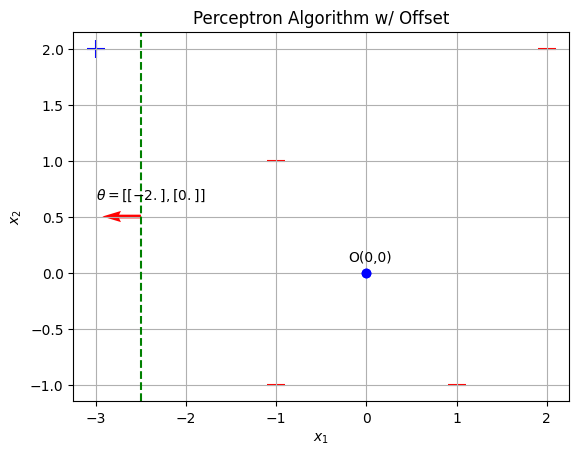

In [166]:
plt.scatter(df[df['y']==1]['x1'], df[df['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y']==-1]['x1'], df[df['y']==-1]['x2'], marker='_', s=150, c='r')
plt.plot(0, 0, 'bo')
plt.title('Perceptron Algorithm w/ Offset')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')

plt.plot(0, 0, 'bo')
plt.text(-0.2, 0.1, 'O(0,0)')

plt.axvline(x = -theta_0/(theta[0]), color='g', linestyle = 'dashed') 
plt.quiver(-theta_0/(theta[0]), 0.5, theta[0], theta[1], color='r', units='xy', scale=5)
plt.text(-3, 0.65, '$\\theta = [{},{}]$'.format(theta[0], theta[1]))

plt.grid()
plt.show()

**Perceptron through origin:**

e.g.1 if we augment the feature vector with feature ``1", we then get an equivalent linear classifier in higher-dimensional space that goes through the origin.

In [232]:
X = np.array([[1], [2], [3], [4]])
y = np.array([[1], [1], [-1], [-1]])

df = pd.DataFrame(X, columns=['x1'])
df = df.assign(x2 = np.zeros(X.shape[0]), y = y)

df_new = pd.DataFrame(X, columns=['x1'])
df_new = df_new.assign(x2 = np.ones(X.shape[0]), y=y)

In [234]:
theta_with_offset, theta_0 = perceptron_with_offset(X, y, 1000)
theta_through_origin =perceptron_through_origin(X, y, 1000)

The data set has 1 features, 4 data points.

After 25 mistake(s), the Perceptron Algorithm (w/ offset) yields theta = [[-3.]], theta_0 = [7.] on the 3th instance

The data set has 1 features and 4 data points.

After 25 mistake(s), the Perceptron Algorithm (through the origin) yields theta = [[-3.]
 [ 7.]] on the 3th instance


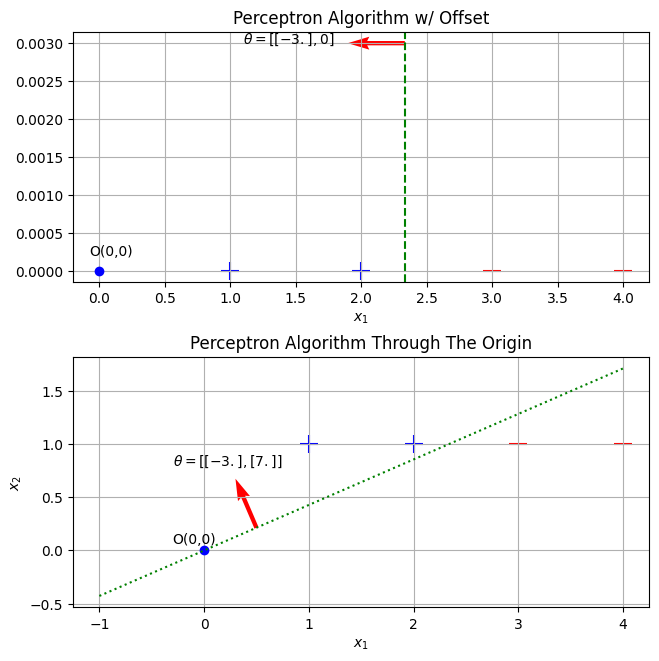

In [235]:
# Figure 1
plt.subplot(2, 1, 1)
plt.scatter(df[df['y']==1]['x1'], df[df['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y']==-1]['x1'], df[df['y']==-1]['x2'], marker='_', s=150, c='r')
plt.title('Perceptron Algorithm w/ Offset')
plt.xlabel('$x_{1}$')
plt.grid()

plt.plot(0, 0, 'bo')
plt.text(-0.08, 0.0002, 'O(0,0)')

plt.axvline(-theta_0/theta_with_offset[0], color='g', linestyle = 'dashed') 
plt.quiver(-theta_0/theta_with_offset[0], 0.003, -2, 0, color='r', units='xy', scale=5)
plt.text(1.1, 0.003, '$\\theta = [{},{}]$'.format(theta_with_offset[0], 0))

# Figure 2
plt.subplot(2, 1, 2)
plt.scatter(df_new[df_new['y']==1]['x1'], df_new[df_new['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df_new[df_new['y']==-1]['x1'], df_new[df_new['y']==1]['x2'], marker='_', s=150, c='r')
plt.title('Perceptron Algorithm Through The Origin')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.grid()

plt.plot(0, 0, 'bo')
plt.text(-0.3, 0.07, 'O(0,0)')

plt.plot(np.linspace(-1, 4, num=10), (-theta_through_origin[0]*np.linspace(-1, 4, num=10))/theta_through_origin[1], 'g:')
plt.quiver(0.5, (- theta_through_origin[0]*0.5)/theta_through_origin[1], theta_through_origin[0], theta_through_origin[1], color='r', units='xy', scale=15)
plt.text(-0.3, 0.8, '$\\theta = [{},{}]$'.format(theta_through_origin[0], theta_through_origin[1]))


plt.subplots_adjust(left=0.1, bottom=0.001, right=1, top=1.2, wspace=0.7, hspace=0.3)
plt.show()

e.g.2

In [346]:
X = np.array([[1,-1],[0,1],[-1.5,1]]).reshape(3,2)
y = np.array([[1],[-1],[1]])

df = pd.DataFrame(X, columns=['x1','x2'])
df = df.assign(y = y)

df_new = pd.DataFrame(X, columns=['x1','x2'])
df_new = df_new.assign(x3 = np.ones(X.shape[0]), y=y)

In [347]:
theta_through_origin=perceptron_through_origin(X, y, 100)
theta_with_offset, theta_0 =perceptron_with_offset(X, y, 100)

The data set has 2 features and 3 data points.

After 9 mistake(s), the Perceptron Algorithm (through the origin) yields theta = [[-2.5]
 [-3. ]
 [ 1. ]] on the 2th instance
The data set has 2 features, 3 data points.

After 9 mistake(s), the Perceptron Algorithm (w/ offset) yields theta = [[-2.5]
 [-3. ]], theta_0 = [1.] on the 2th instance



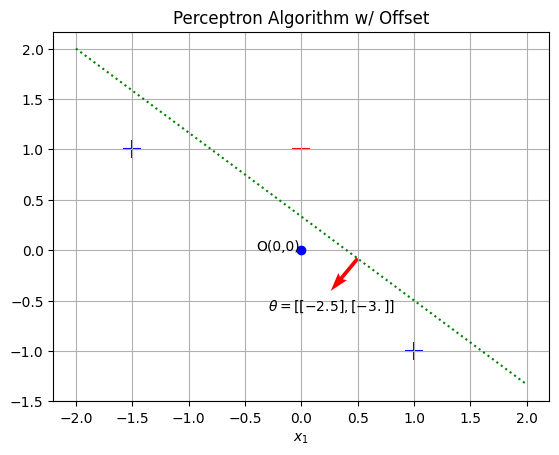

In [348]:
plt.scatter(df[df['y']==1]['x1'], df[df['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y']==-1]['x1'], df[df['y']==-1]['x2'], marker='_', s=150, c='r')
plt.title('Perceptron Algorithm w/ Offset')
plt.xlabel('$x_{1}$')
plt.grid()

plt.plot(0, 0, 'bo')
plt.text(-0.4, 0, 'O(0,0)')

plt.plot(np.linspace(-2, 2, num=10), (-theta_0-theta_through_origin[0]*np.linspace(-2, 2, num=10))/theta_through_origin[1], 'g:')
plt.quiver(0.5, (-theta_0- theta_through_origin[0]*0.5)/theta_through_origin[1], theta_through_origin[0], theta_through_origin[1], color='r', units='xy', scale=10)
plt.text(-0.3, -0.6, '$\\theta = [{},{}]$'.format(theta_through_origin[0], theta_through_origin[1]))

plt.show()

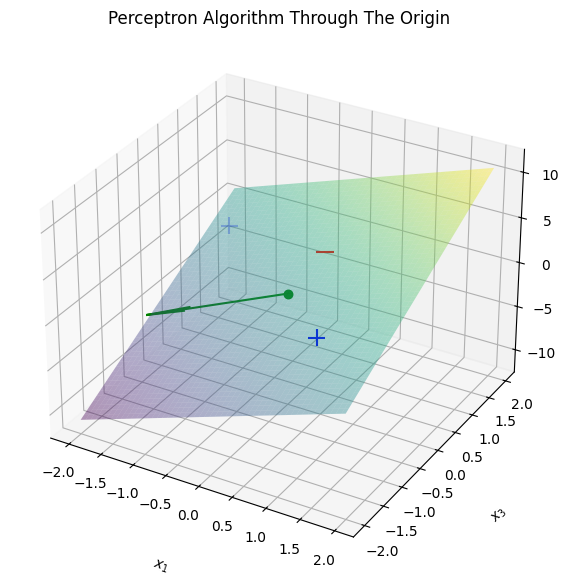

In [349]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(-2, 2, 0.02)
y = np.arange(-2, 2, 0.02)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, -(theta_through_origin[0]*X + theta_through_origin[1]*Y)/theta_through_origin[2], cmap='viridis', alpha=0.4)
ax.quiver(0,0,0, theta_through_origin[0]/2, theta_through_origin[1]/2, theta_through_origin[2]/2, color='g')

ax.scatter(df_new[df_new['y']==1]['x1'], df_new[df_new['y']==1]['x2'], df_new[df_new['y']==1]['x3'], marker='+', s=150, c='b')
ax.scatter(df_new[df_new['y']==-1]['x1'], df_new[df_new['y']==-1]['x2'],  df_new[df_new['y']==-1]['x3'], marker='_', s=150, c='r')
ax.set_title('Perceptron Algorithm Through The Origin')
ax.set_xlabel('$x_1$', labelpad=20)
ax.set_ylabel('$x_2$', labelpad=20)
ax.set_ylabel('$x_3$', labelpad=20)

ax.scatter(0, 0, 0, marker='.', s=150, c='green')

e.g.3

In [350]:
X = np.array([[1,-1],[0,1],[-10,-1]]).reshape(3,2)
y = np.array([[1],[-1],[1]])

df = pd.DataFrame(X, columns=['x1','x2'])
df = df.assign(y = y)

df_new = pd.DataFrame(X, columns=['x1','x2'])
df_new = df_new.assign(x3 = np.ones(X.shape[0]), y=y)

In [351]:
theta_with_offset, theta_0 = perceptron_with_offset(X, y, 100)
theta_through_origin=perceptron_through_origin(X, y, 100)

The data set has 2 features, 3 data points.

After 5 mistake(s), the Perceptron Algorithm (w/ offset) yields theta = [[-7.]
 [-5.]], theta_0 = [3.] on the 2th instance

The data set has 2 features and 3 data points.

After 5 mistake(s), the Perceptron Algorithm (through the origin) yields theta = [[-7.]
 [-5.]
 [ 3.]] on the 2th instance


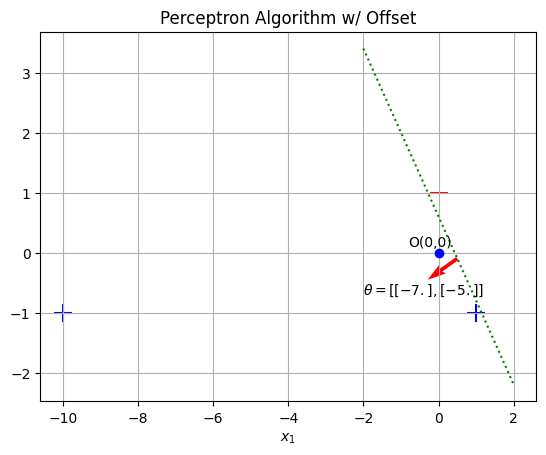

In [358]:
plt.scatter(df[df['y']==1]['x1'], df[df['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y']==-1]['x1'], df[df['y']==-1]['x2'], marker='_', s=150, c='r')
plt.title('Perceptron Algorithm w/ Offset')
plt.xlabel('$x_{1}$')
plt.grid()

plt.plot(0, 0, 'bo')
plt.text(-0.8, 0.1, 'O(0,0)')

plt.plot(np.linspace(-2, 2, num=10), (-theta_0-theta_through_origin[0]*np.linspace(-2, 2, num=10))/theta_through_origin[1], 'g:')
plt.quiver(0.5, (-theta_0- theta_through_origin[0]*0.5)/theta_through_origin[1], theta_through_origin[0], theta_through_origin[1], color='r', units='xy', scale=10)
plt.text(-2, -0.7, '$\\theta = [{},{}]$'.format(theta_through_origin[0], theta_through_origin[1]))

plt.show()

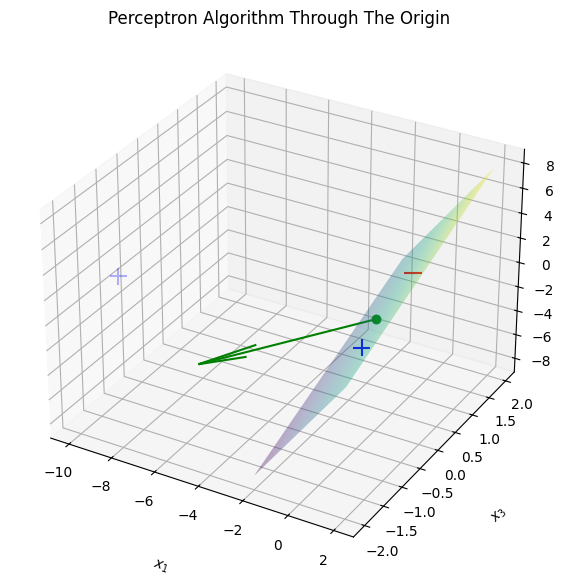

In [359]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(-2, 2, 0.02)
y = np.arange(-2, 2, 0.02)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, -(theta_through_origin[0]*X + theta_through_origin[1]*Y)/theta_through_origin[2], cmap='viridis', alpha=0.4)
ax.quiver(0,0,0, theta_through_origin[0]/2, theta_through_origin[1]/2, theta_through_origin[2]/2, color='g')

ax.scatter(df_new[df_new['y']==1]['x1'], df_new[df_new['y']==1]['x2'], df_new[df_new['y']==1]['x3'], marker='+', s=150, c='b')
ax.scatter(df_new[df_new['y']==-1]['x1'], df_new[df_new['y']==-1]['x2'],  df_new[df_new['y']==-1]['x3'], marker='_', s=150, c='r')
ax.set_title('Perceptron Algorithm Through The Origin')
ax.set_xlabel('$x_1$', labelpad=20)
ax.set_ylabel('$x_2$', labelpad=20)
ax.set_ylabel('$x_3$', labelpad=20)

ax.scatter(0, 0, 0, marker='.', s=150, c='green')

**Linear separability:**

e.g.1 

In [360]:
X1 = np.array([[1,-1],[1,1],[2,-1],[2,1]]).reshape(4,2)
y1 = [-1,1,1,-1]

df1 = pd.DataFrame(X1, columns=['x1','x2'])
df1 = df1.assign(y = y1)

In [361]:
X2 = np.array([[1,-1],[1,1],[2,-1],[2,1]]).reshape(4,2)
y2 = [1,1,-1,-1]

df2 = pd.DataFrame(X2, columns=['x1','x2'])
df2 = df2.assign(y = y2)

theta, theta_0=perceptron_with_offset(X2, y2, 100)

The data set has 2 features, 4 data points.

After 18 mistake(s), the Perceptron Algorithm (w/ offset) yields theta = [[-3.]
 [ 0.]], theta_0 = [4.] on the 3th instance



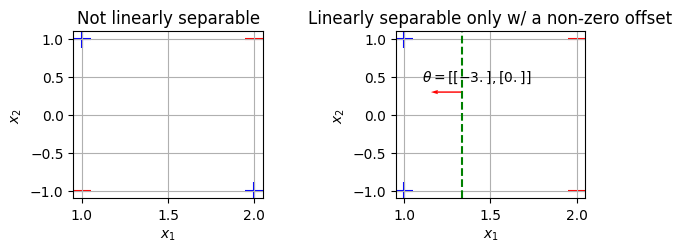

In [362]:
plt.subplot(2,2,1)
plt.scatter(df1[df1['y']==1]['x1'], df1[df1['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df1[df1['y']==-1]['x1'], df1[df1['y']==-1]['x2'], marker='_', s=150, c='r')
plt.title('Not linearly separable')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.grid()

plt.subplot(2,2,2)
plt.scatter(df2[df2['y']==1]['x1'], df2[df2['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df2[df2['y']==-1]['x1'], df2[df2['y']==-1]['x2'], marker='_', s=150, c='r')
plt.title('Linearly separable only w/ a non-zero offset')

plt.axvline(x = -theta_0/theta[0], color = 'g', linestyle = 'dashed') 
plt.quiver(-theta_0/theta[0], 0.3, theta[0], theta[1], color='r', units='xy', scale=10)
plt.text(1.1, 0.45, '$\\theta = [{},{}]$'.format(theta[0], theta[1]))
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.7, hspace=0.3)
plt.show()

**Feature Transformation:**

e.g. Exclusive or (XOR)

* $\phi(x_1, x_2) = [1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$ yields the classifier $4x_1 x_2 = 0$

In [364]:
X = np.array([[-1,-1], [-1,1], [1,-1], [1,1]]).reshape(4,2)
y = [1,-1,-1,1]

df = pd.DataFrame(X, columns=['x1', 'x2'])
df = df.assign(y=y)

phi = np.array(list(zip(np.ones(4), X[:, 0], X[:,1], np.square(X[:,0]), X[:,0]*X[:,1], np.square(X[:,1]))))

theta, theta_0=perceptron_with_offset(phi, y, 1000)

The data set has 6 features, 4 data points.

After 4 mistake(s), the Perceptron Algorithm (w/ offset) yields theta = [[0.]
 [0.]
 [0.]
 [0.]
 [4.]
 [0.]], theta_0 = [0.] on the 3th instance



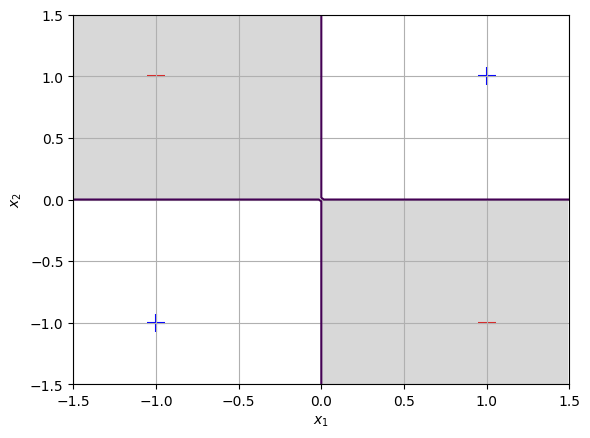

In [371]:
fig, ax = plt.subplots()

plt.scatter(df[df['y'] == 1]['x1'], df[df['y'] == 1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y'] == -1]['x1'], df[df['y'] ==-1]['x2'], marker='_', s=150, c='r')

X_1c, X_2c = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100)) # set up mesh grid
ax.contour(X_1c, X_2c, theta[0,0]*1 + theta[1,0]*X_1c + theta[2,0]*X_2c + theta[3,0]*(X_1c**2) + theta[4,0]*(X_1c*X_2c) + theta[5,0]*(X_2c**2), [-theta_0[0]]) # plot contour
ax.fill_between(np.arange(-1.5, 0, 0.01), 0, 1.5, alpha=0.3, facecolor ='grey')
ax.fill_between(np.arange(0, 1.5, 0.01), -1.5, 0, alpha=0.3, facecolor ='grey')

plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title('')
plt.grid()
plt.show() 